# Software Evolution - Practical Session
## Laws of software evolution based on code counting
## Academic year 2023-2024

### Write your answers under the questions that are present in this notebook  

#### Note: Print the final output of each cell in this notebook

#### Read the provided description document before proceeding with the following notebook

## 1.  Data preprocessing

To install packages, use :

pip install tqdm  pandas numpy matplotlib scikit-learn

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from permetrics.regression import RegressionMetric
from scipy.optimize import curve_fit

### Import dataset

First, import the dataset that contains the total lines of code, total blank lines, total comment lines, total number of files, and release date for each tag.

In [207]:
# WRITE YOUR CODE HERE

# Load the data
data = pd.read_csv('data/LawIncreasingGrowthDataset.csv')
print(data.head())

      tag   code  blank  comment  nFiles release_date
0     1.4  48551   8727    11154     419   2009-01-06
1   1.5.0  63240  11018    18457     512   2009-02-18
2  jaunty  70751  11840    19671     578   2009-06-23
3   1.5.1  67939  11618    18131     600   2009-08-05
4   1.5.2  68564  11555    11906     611   2009-08-17


### Dataset A : Major.Minor.Patch tag format

Filter out non-official releases such as alpha, beta, release candidates, milestones, branches, and unnumbered tags. Additionally, version numbers typically follow a Major.Minor.Patch format, but exceptions exist (e.g., 1.4, 3.3.0.1, 4.3.0.1, or 4.3.1.1). Versions with more than three components are disregarded, and two-component versions are treated as implicit three-component versions (e.g., 1.4 is interpreted as 1.4.0).  

Write a regular expression statement to identify tags following semantic versioning (major.minor.patch) guidelines. You can use the pattern: '^v?[0-9]+\.[0-9]+(\.[0-9]+)?$'  

Once you've applied this regex, print out the selected major.minor.patch dataset.

In [208]:
import re
# WRITE YOUR CODE HERE
# Apply regex pattern to filter out non-official releases
pattern = r'^v?[0-9]+\.[0-9]+(\.[0-9]+)?$'
dataset_A = data[data['tag'].str.match(pattern)]

# Print the selected major.minor.patch dataset
print(dataset_A)

      tag    code  blank  comment  nFiles release_date
0     1.4   48551   8727    11154     419   2009-01-06
1   1.5.0   63240  11018    18457     512   2009-02-18
3   1.5.1   67939  11618    18131     600   2009-08-05
4   1.5.2   68564  11555    11906     611   2009-08-17
6   1.6.1   86799  14582    41327     744   2009-11-05
9   2.0.0  115586  18488    42717    1074   2010-06-05
10  2.0.1  115699  18492    42724    1074   2010-07-06
21  3.0.0  188246  29836    60879    1694   2012-02-07
22  3.0.1  189022  29945    61587    1696   2012-03-12
26  3.1.0  191269  29973    62628    1642   2012-06-22
27  3.1.1  192026  30086    62931    1645   2012-09-17
28  3.1.2  192113  30101    62959    1646   2012-09-27
29  3.2.0  257934  43596   119688    2004   2012-12-17
33  3.2.1  260231  43992   120082    2011   2013-02-28
36  3.2.2  260173  43974   120045    2007   2013-04-16
38  3.3.0  350914  58798   159566    2682   2013-06-20
40  3.3.1  359678  60196   161364    2760   2013-09-11
41  3.3.2 

### Dataset B : Major.Minor tag format

Starting from the previous data (**Dataset A**),  for each Major.Minor.Patch tag group, select the earliest version (e.g., for a set of 4.4.0, 4.4.1, and 4.4.2, consider 4.4.0 and rename it to 4.4).

In [209]:
#datasetA 
dataset_B = dataset_A.copy()
# replace the tag column and keep only the earliest with release date version of each major.minor release 
dataset_B['tag'] = dataset_B['tag'].str.replace(r'(\.[0-9]+)$', '')
dataset_B = dataset_B.drop_duplicates(subset='tag', keep='first')
print(dataset_B)


    tag    code  blank  comment  nFiles release_date
0     1   48551   8727    11154     419   2009-01-06
1   1.5   63240  11018    18457     512   2009-02-18
6   1.6   86799  14582    41327     744   2009-11-05
9   2.0  115586  18488    42717    1074   2010-06-05
21  3.0  188246  29836    60879    1694   2012-02-07
26  3.1  191269  29973    62628    1642   2012-06-22
29  3.2  257934  43596   119688    2004   2012-12-17
38  3.3  350914  58798   159566    2682   2013-06-20
42  3.4  291555  48371   149981    2367   2013-10-24
45  4.0  357375  57707   159944    2790   2014-05-30
48  4.1  419663  68854   208270    3283   2015-01-28
51  4.2  438240  71324   218459    3439   2015-10-22
54  4.3  455646  72172   219435    3405   2016-08-09
58  4.4  472926  75325   216544    3597   2017-03-07


C:\Users\loris\AppData\Local\Temp\ipykernel_5944\1139306300.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset_B['tag'] = dataset_B['tag'].str.replace(r'(\.[0-9]+)$', '')


## 2. Law of Increasing Growth

### Software project's metrics

Visualize four plots representing the evolution of a software project's metrics, including the number of lines of code, blank lines, comment lines, and the number of files, as follows:  

1. Plot the metrics against software version numbers:  
   1.1) For version tags of the format major.minor.patch.  
   1.2) For version tags of the format major.minor.  
   Place these plots at positions (0,0) and (0,1) respectively.  
  
2. Plot the metrics against dates:  
   2.1) For version tags of the format major.minor.patch.  
   2.2) For version tags of the format major.minor.  
   Place these plots right below the corresponding version-based plots, at positions (1,0) and (1,1).  

Hint: Ensure proper datetime formatting for the dates in the datasets instead of storing them as strings.

For example, if you're working with a DataFrame:

fig, axes = plt.subplots(2, 2, figsize=(18, 10))  
dataset_a[['code', 'blank', 'comment', 'nFiles', 'tag']].plot(x='tag', ax=axes[0, 0], legend=True)  
.....  

axes[0, 0].set_xlabel('Major.Minor.Patch versions')  
.....  

plt.tight_layout()  
plt.show()

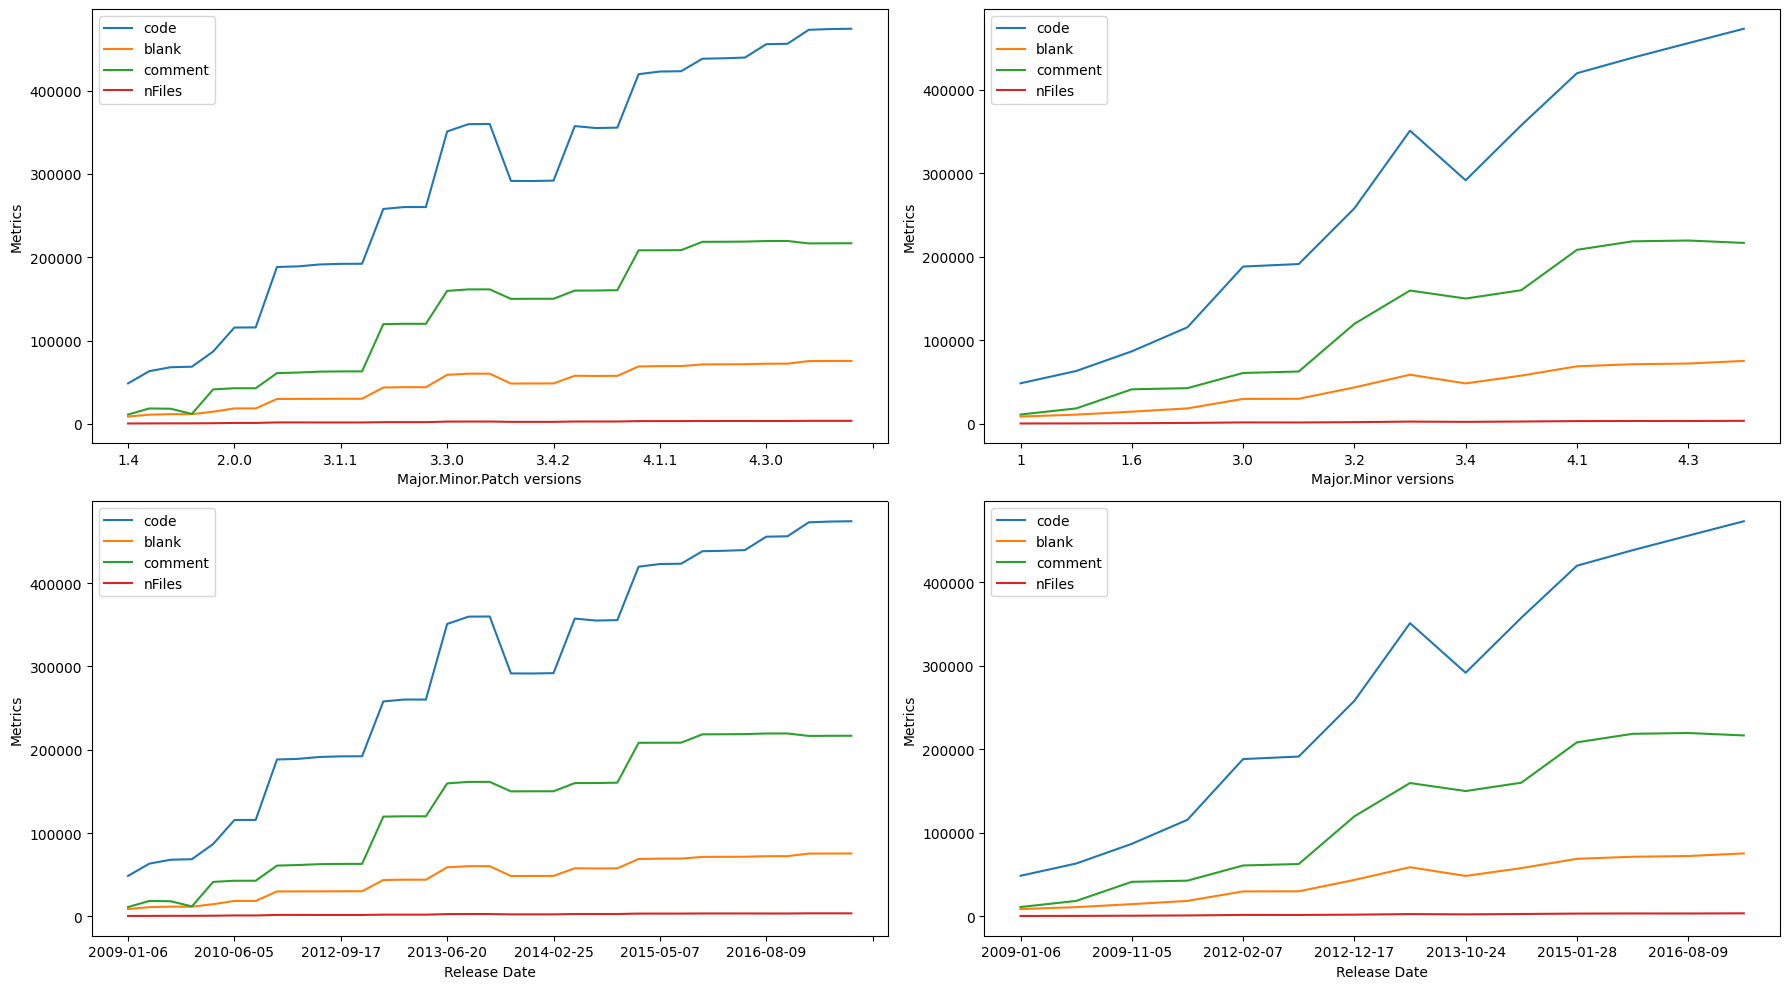

In [210]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Plot metrics against software version numbers (major.minor.patch)
dataset_A[['code', 'blank', 'comment', 'nFiles', 'tag']].plot(x='tag', ax=axes[0, 0], legend=True) 
axes[0, 0].set_xlabel('Major.Minor.Patch versions')
axes[0, 0].set_ylabel('Metrics')

# Plot metrics against software version numbers (major.minor)
dataset_B[['code', 'blank', 'comment', 'nFiles','tag']].plot(x='tag', ax=axes[0, 1], legend=True)
axes[0, 1].set_xlabel('Major.Minor versions')
axes[0, 1].set_ylabel('Metrics')

# Plot metrics against dates (major.minor.patch)
dataset_A[['code', 'blank', 'comment', 'nFiles','tag','release_date']].plot(x='release_date', ax=axes[1, 0], legend=True)
axes[1, 0].set_xlabel('Release Date')
axes[1, 0].set_ylabel('Metrics')

# Plot metrics against dates (major.minor)
dataset_B[['code', 'blank', 'comment', 'nFiles','tag','release_date']].plot(x='release_date', ax=axes[1, 1], legend=True)
axes[1, 1].set_xlabel('Release Date')
axes[1, 1].set_ylabel('Metrics')

plt.tight_layout()
plt.show()


### Questions:

1. Do you find any difference between the plot that is having date in the x-axis and the plot that is having tag in the x-axis? If yes, then what is the difference? If no, then why is it same?

No this is the the same because because one date correspond to one release, we have the same addition to the code. 

2. Which type of plot is preferable for software evolution analysis?   
    a) date in x-axis  
    b) tag in x-axis  
Why?

By tag, for me it looks better it show the evolves by differents release over time, i show the progress better

### Correlation 

Correlation is generally used to analyse the relationship between variables. Here, analyse the relationship between the number of lines of code and the number of files using Spearman correlation and Pearson correlation by considering **Dataset A**. Report the correlation upto 3 decimal places.

In [211]:
# WRITE YOUR CODE HERE

spearman_corr = dataset_A[['code', 'nFiles']].corr(method='spearman').iloc[0, 1]
pearson_corr = dataset_A[['code', 'nFiles']].corr(method='pearson').iloc[0, 1]

spearman_corr = round(spearman_corr, 3)
pearson_corr = round(pearson_corr, 3)

print("Spearman correlation:", spearman_corr)
print("Pearson correlation:", pearson_corr)

Spearman correlation: 0.986
Pearson correlation: 0.998


### Questions:

3. Do you find any difference in correlation values between Pearson and Spearman? Which correlation measure is preferable for this use case? why?

Both are strongly correled but Pearson is very close and looks better in this case.

4. Based on the above correlation value, please give your opinion on the relation between the number of lines and the number of files? Which of both size metrics do you propose to use in the remainder of your analysis?

Yes it is normal, more files you have more lines you have, let's keep Pearson

### Regression analysis

Visualize a linear regression analysis of the relationship between the release date and the total number of files by considering **Dataset B**.  

Hint:

1. Prepare the data: Convert the release date to integers and set number of files as the target variable.  
2. Apply linear regression analysis to understand the relationship between the release date and the total number of files.  
3. Calculate Mean Relative Error and ajusted R-squared metrics.    
4. Generate a scatter plot showing the release dates against the total number of files. Then, overlay the linear regression line on the plot.


Adjusted R-squared: 0.9698878845416344


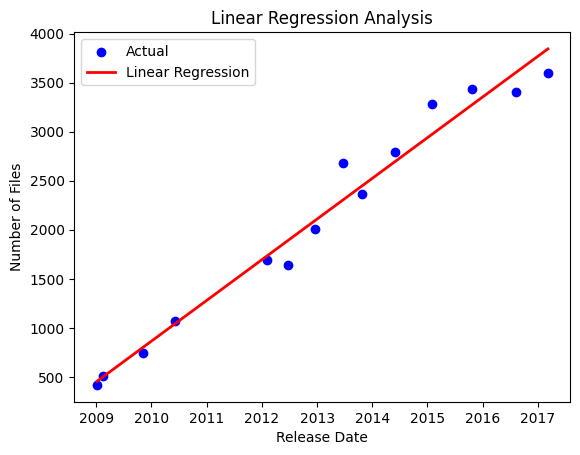

Mean Relative Error: 0.06491034820337886
Adjusted R-squared: 0.9698878845416344


In [212]:
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
dataset_B['release_date'] = pd.to_datetime(dataset_B['release_date'])
X = dataset_B['release_date'].values.reshape(-1, 1).astype(np.int64) 
y = dataset_B['nFiles'].values

# Apply linear regression analysis
regression_model = LinearRegression()
regression_model.fit(X, y)



y_pred = regression_model.predict(X)

# Calculate Mean Relative Error and adjusted R-squared metrics
n = len(y)
mre = np.sum(np.abs(y - y_pred) / np.abs(y)) / n
r2 = r2_score(y, y_pred)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - 1 - 1)
print("Adjusted R-squared:", adjusted_r2)


# Generate scatter plot with linear regression line
plt.scatter(dataset_B['release_date'], y, color='blue', label='Actual')
plt.plot(dataset_B['release_date'], y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Release Date')
plt.ylabel('Number of Files')
plt.title('Linear Regression Analysis')
plt.legend()
plt.show()

# Print metrics
print("Mean Relative Error:", mre)
print("Adjusted R-squared:", adjusted_r2)


### Questions:

5. Choose an option regarding the growth of the software. Motivate your choice using the 2D regression plot.  
    a) Linear  
    b) Sub-linear  
    c) Super-linear  


I choose linear. We can see that the data points are around the regression line and maintain an even distribution on both sides,it shows a consistent increase in file numbers over time.

6. Report the MRE and ajusted R-squared values.

Mean Relative Error: 0.064
Adjusted R-squared: 0.969

### Fitting & forecasting

Using **Dataset A**, apply parametric regression models (e.g., linear, exponential, power, quadratic, logarithmic) to predict the number of files in software releases based on historical data.

**Steps:**

1. Prepare Data:
   - Convert "release_date" to datetime format.
   - Calculate "release_days" as the number of days since the earliest release.

2. Split Data:
   - Separate data into features (release days) and target variable (number of files).
   - Split data into training and testing sets from the earliest release up to a specific point.

3. Build and Train Models:
   - Define regression models.
   - Fit models to training data (maybe using `curve_fit` from SciPy).

4. Forecast Future Data:
   - Predict the number of files for future release days using trained models.

5. Visualize Results:
   - Plot original data and forecasted values for each regression model.

6. Evaluate Models:
   - Calculate adjusted R-squared and mean relative error for each model using training and test data.

In [213]:
# WRITE YOUR CODE HERE

# Convert "release_date" to datetime format
dataset_A['release_date'] = pd.to_datetime(dataset_A['release_date'])

# Calculate "release_days" as the number of days since the earliest release
dataset_A['release_days'] = (dataset_A['release_date'] - dataset_A['release_date'].min()).dt.days


C:\Users\loris\AppData\Local\Temp\ipykernel_5944\3302028369.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_A['release_date'] = pd.to_datetime(dataset_A['release_date'])
C:\Users\loris\AppData\Local\Temp\ipykernel_5944\3302028369.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_A['release_days'] = (dataset_A['release_date'] - dataset_A['release_date'].min()).dt.days


In [214]:
# WRITE YOUR CODE HERE
from sklearn.model_selection import train_test_split

# Separate data into features (release days) and target variable (number of files)
X = dataset_A[['release_days']]
y = dataset_A['nFiles']

# Split data into training and testing sets from the earliest release up to a specific point
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [215]:
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import numpy as np
from scipy.optimize import curve_fit
# WRITE YOUR CODE HERE

# Linear Regression
linear_model = LinearRegression()
# Exponential Regression
def exponential_func(x, a, b):
    return a * np.exp(b * x)
# Power Regression
def power_func(x, a, b):
    return a * np.power(x, b)
# Quadratic Regression
def quadratic_func(x, a, b, c):
    return a * np.power(x, 2) + b * x + c

#fit the model

linear_model.fit(X_train, y_train)
power_params, _ = curve_fit(power_func, X_train.squeeze(), y_train)
exponential_params, _ = curve_fit(exponential_func, X_train.squeeze(), y_train, p0=(1, 0.01))
quadratic_params, _ = curve_fit(quadratic_func, X_train.squeeze(), y_train)

print("Linear Regression Coefficients:", linear_model.coef_)
print("Exponential Regression Coefficients:", exponential_params)
print("Power Regression Coefficients:", power_params)
print("Quadratic Regression Coefficients:", quadratic_params)

Linear Regression Coefficients: [1.09246556]
Exponential Regression Coefficients: [9.58836992e+02 4.63259979e-04]
Power Regression Coefficients: [8.92881089 0.75038419]
Quadratic Regression Coefficients: [-5.95697766e-05  1.27734508e+00  3.52186862e+02]


In [216]:
# WRITE YOUR CODE HERE

# Predict future data using trained models
linear_y_future_pred = linear_model.predict(X_test)
exponential_y_future_pred = exponential_regression(X_test.squeeze(), *exponential_params)
power_y_future_pred = power_regression(X_test.squeeze(), *power_params)
quadratic_y_future_pred = quadratic_regression(X_test.squeeze(), *quadratic_params)


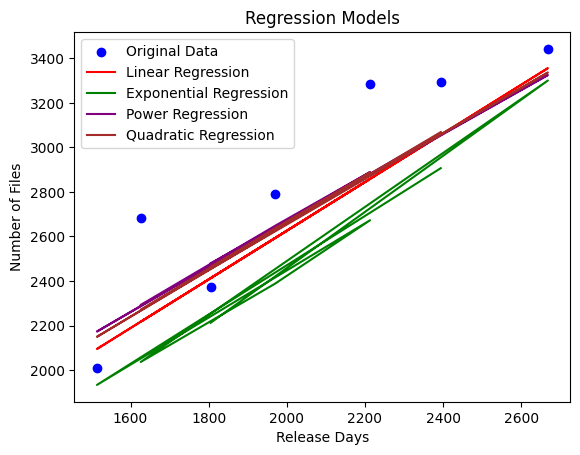

In [217]:
import matplotlib.pyplot as plt


# Plotting the original data
plt.scatter(X_test, y_test, color='blue', label='Original Data')

# Plotting the forecasted values for each regression model
plt.plot(X_test, linear_y_future_pred, color='red', label='Linear Regression')
plt.plot(X_test, exponential_y_future_pred, color='green', label='Exponential Regression')
plt.plot(X_test, power_y_future_pred, color='purple', label='Power Regression')
plt.plot(X_test, quadratic_y_future_pred, color='brown', label='Quadratic Regression')

# Adding labels and legend
plt.xlabel('Release Days')
plt.ylabel('Number of Files')
plt.title('Regression Models')
plt.legend()

plt.show()


In [218]:
# WRITE YOUR CODE HERE

# Calculate Mean Relative Error and adjusted R-squared metrics for each regression model
n = len(y_test)

mre_linear = np.sum(np.abs(y_test - linear_y_future_pred) / np.abs(y_test)) / n
r2_linear = r2_score(y_test, linear_y_future_pred)
adjusted_r2_linear = 1 - (1 - r2_linear) * (n - 1) / (n - 1 - 1)
print("Linear Adjusted R-squared:", adjusted_r2_linear, ' Mean Relative Error:', mre_linear)
print("\n")

mre_exponential = np.sum(np.abs(y_test - exponential_y_future_pred) / np.abs(y_test)) / n
r2_exponential = r2_score(y_test, exponential_y_future_pred)
adjusted_r2_exponential = 1 - (1 - r2_exponential) * (n - 1) / (n - 1 - 1)
print("Exponential Adjusted R-squared:", adjusted_r2_exponential, ' Mean Relative Error:', mre_exponential)
print("\n")

mre_power = np.sum(np.abs(y_test - power_y_future_pred) / np.abs(y_test)) / n
r2_power = r2_score(y_test, power_y_future_pred)
adjusted_r2_power = 1 - (1 - r2_power) * (n - 1) / (n - 1 - 1)
print("Power Adjusted R-squared:", adjusted_r2_power, ' Mean Relative Error:', mre_power)
print("\n")

mre_quadratic = np.sum(np.abs(y_test - quadratic_y_future_pred) / np.abs(y_test)) / n
r2_quadratic = r2_score(y_test, quadratic_y_future_pred)
adjusted_r2_quadratic = 1 - (1 - r2_quadratic) * (n - 1) / (n - 1 - 1)
print("Quadratic Adjusted R-squared:", adjusted_r2_quadratic, ' Mean Relative Error:', mre_quadratic)


Linear Adjusted R-squared: 0.6415138042384536  Mean Relative Error: 0.07558135588392345


Exponential Adjusted R-squared: 0.18631143301247644  Mean Relative Error: 0.11925628132919319


Power Adjusted R-squared: 0.6958994000234245  Mean Relative Error: 0.0779018665066894


Quadratic Adjusted R-squared: 0.6907850028360711  Mean Relative Error: 0.07638323345655777


### Questions:

7. Which regression model do you prefer for assessing the goodness of fit, based on the evaluation metrics scores? Why?

8. Which regression model do you prefer for assessing forecast accuracy, based on the evaluation metrics scores? Why?

### Modify the CLOC parameters

Exclude all bank lines and verify if the Law of Increasing Growth applies after this filtering
Exclude all comment lines and verify if the Law of Increasing Growth applies after this filtering

C:\Users\loris\AppData\Local\Temp\ipykernel_5944\2245821094.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dataset_A = df[df["tag"].str.contains(r'^v?[0-9]+\.[0-9]+(\.[0-9]+)?$', regex=True)]
C:\Users\loris\AppData\Local\Temp\ipykernel_5944\2245821094.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_A['date'] = pd.to_datetime(dataset_A['release_date'])
C:\Users\loris\AppData\Local\Temp\ipykernel_5944\2245821094.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

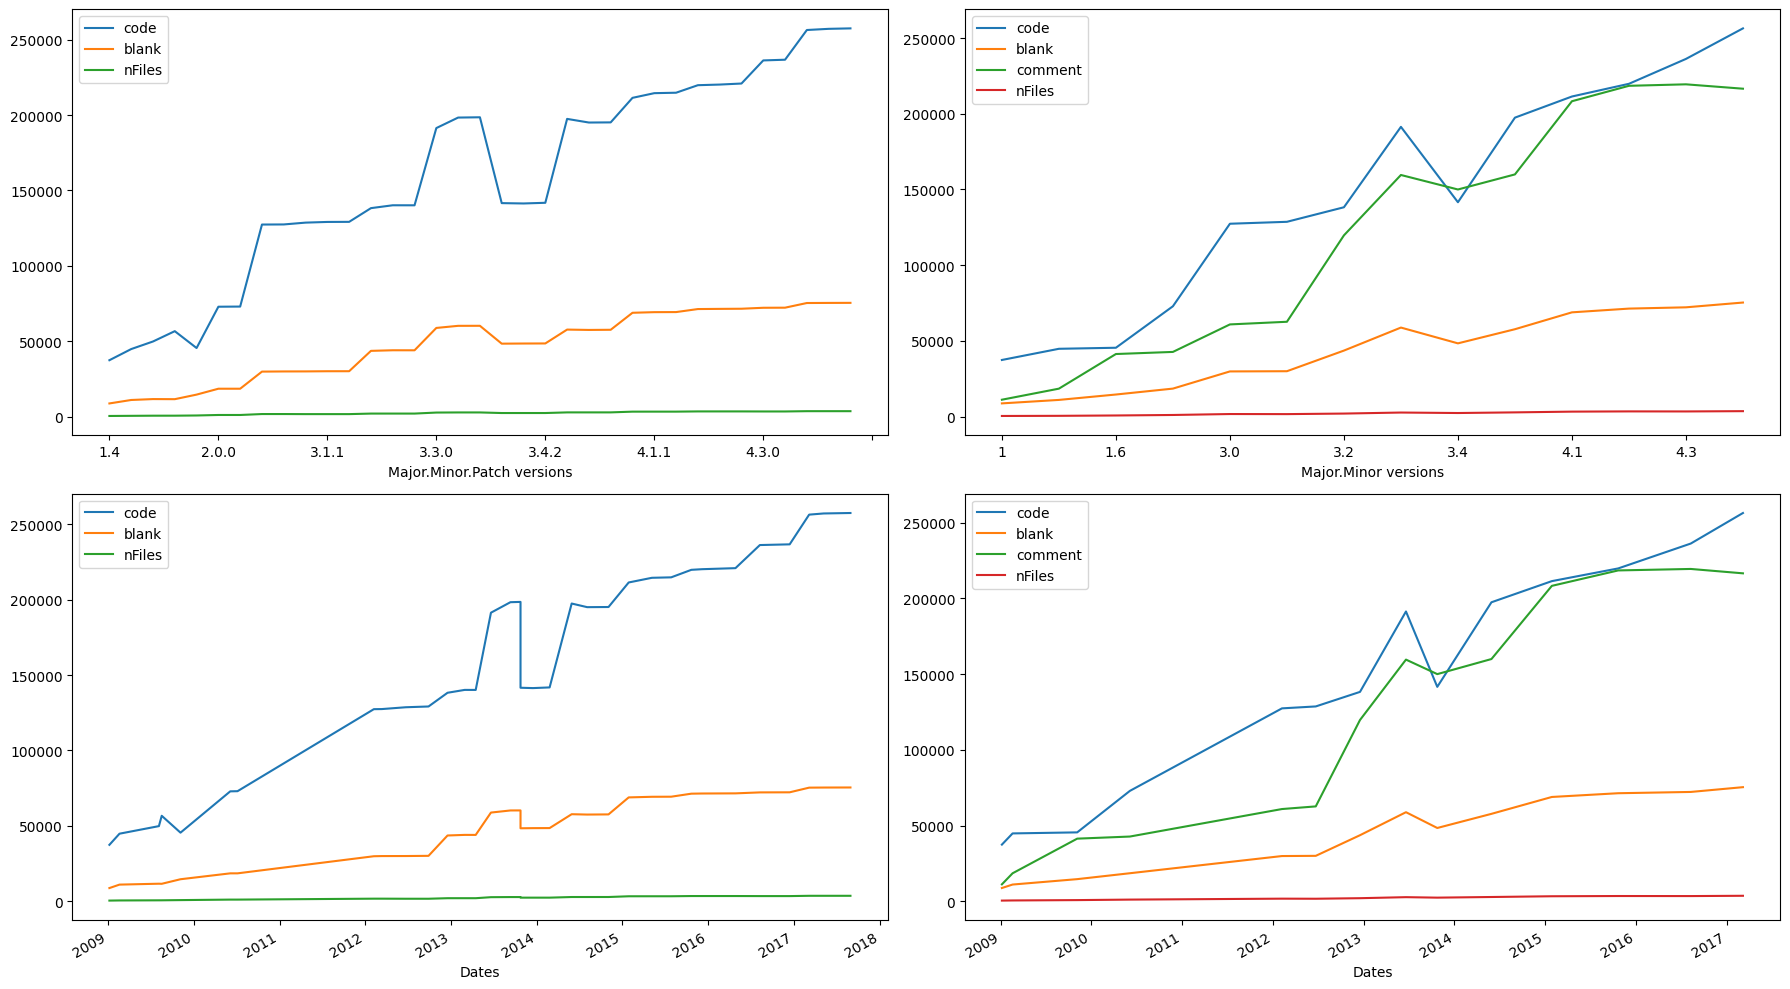

In [219]:
# WRITE YOUR CODE HERE
df = pd.read_csv('data/LawIncreasingGrowthDataset.csv')
dataset_A = df[df["tag"].str.contains(r'^v?[0-9]+\.[0-9]+(\.[0-9]+)?$', regex=True)]
dataset_B = dataset_A.copy()
dataset_B["tag"] = dataset_B["tag"].str.replace(r'\.[0-9]$', '', regex=True)
dataset_B.drop_duplicates(subset="tag", keep="first", inplace=True)

dataset_A['date'] = pd.to_datetime(dataset_A['release_date'])
dataset_B['date'] = pd.to_datetime(dataset_B['release_date'])

# Remove comments from the code
dataset_A['code'] = dataset_A['code'] - dataset_A['comment']
dataset_B['code'] = dataset_B['code'] - dataset_B['comment']

# Plotting code
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Plot for major.minor.patch format
dataset_A[['code', 'blank', 'nFiles', 'tag']].plot(x='tag', ax=axes[0, 0], legend=True)
dataset_A[['code', 'blank', 'nFiles', 'date']].plot(x='date', ax=axes[1, 0], legend=True)

axes[0, 0].set_xlabel('Major.Minor.Patch versions')
axes[1, 0].set_xlabel('Dates')

# Plot for major.minor format
dataset_B[['code', 'blank', 'comment', 'nFiles', 'tag']].plot(x='tag', ax=axes[0, 1], legend=True)
dataset_B[['code', 'blank', 'comment', 'nFiles', 'date']].plot(x='date', ax=axes[1, 1], legend=True)

axes[0, 1].set_xlabel('Major.Minor versions')
axes[1, 1].set_xlabel('Dates')

plt.tight_layout()
plt.show()


## 3. Law of Continuing Change

### Dataset A : Major.Minor.Patch tag format

Import Dataset A that contains number of lines of code that are added, modified, removed and same between two consecutive tags for the three component versions (major.minor.patch)

In [226]:
import pandas as pd
# WRITE YOUR CODE HERE
# Read the CSV file into a DataFrame
set_A = pd.read_csv("data/LawContinuingChangeDatasetA.csv")

# Display the DataFrame
print(set_A)



   first_tag second_tag   added    same  modified  removed        date
0        1.4      1.5.0    2681   43708      2162    17370  2009-02-18
1      1.5.0      1.5.1   34218   25802      3220    38813  2009-08-05
2      1.5.1      1.5.2   18832   46583      2420    19665  2009-08-17
3      1.5.2      1.6.1   10056   50312      8300    28187  2009-11-05
4      1.6.1      2.0.0   24236   55784      6779    53023  2010-06-05
5      2.0.0      2.0.1       4  115527        55      117  2010-07-06
6      2.0.1      3.0.0   49353   56547      9799   121900  2012-02-07
7      3.0.0      3.0.1      34  188138        74      810  2012-03-12
8      3.0.1      3.1.0    9059  176395      3568    11306  2012-06-22
9      3.1.0      3.1.1      77  191025       167      834  2012-09-17
10     3.1.1      3.1.2      17  191978        31      104  2012-09-27
11     3.1.2      3.2.0   20767  152573     18773    86588  2012-12-17
12     3.2.0      3.2.1     980  255160      1794     3277  2013-02-28
13    

Create a plot displaying all features together. Show the outcomes with dates on the x-axis and the corresponding numbers on the y-axis.

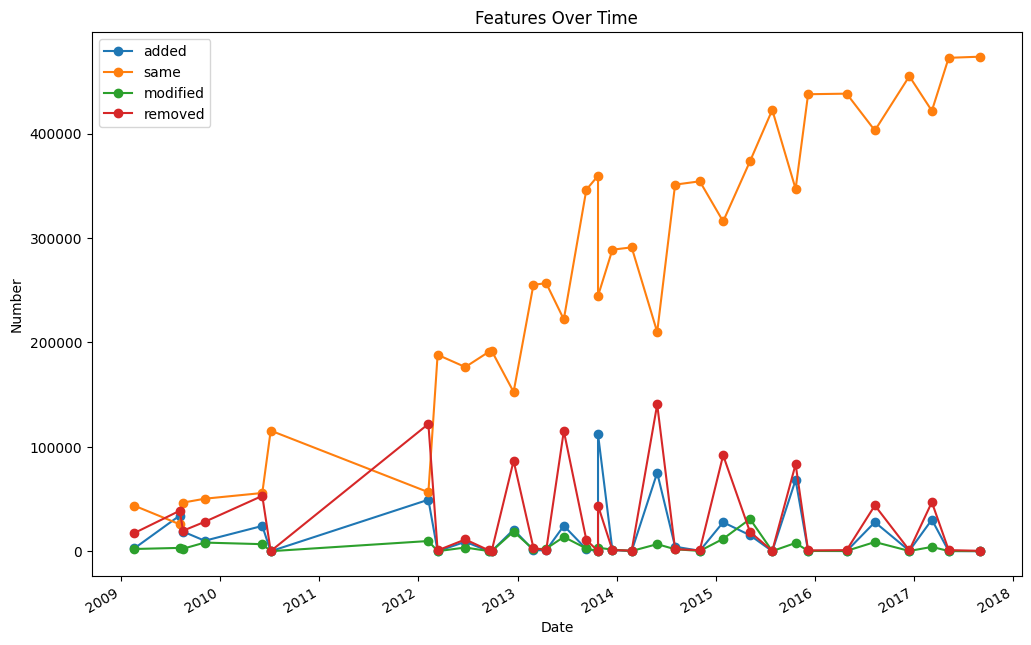

In [227]:
# WRITE YOUR CODE HERE

# Convert 'date' column to datetime
set_A['date'] = pd.to_datetime(set_A['date'])

# Set 'date' as index
set_A.set_index('date', inplace=True)

# Plot all features
set_A.plot(figsize=(12, 8), linestyle='-', marker='o')

plt.xlabel('Date')
plt.ylabel('Number')
plt.title('Features Over Time')
plt.legend()
plt.show()

### Dataset B : Major.Minor tag format

Import Dataset B that contains number of lines of code that are added, modified, removed and same between two consecutive tags for the minor versions (major.minor)

In [228]:
# WRITE YOUR CODE HERE
set_B = pd.read_csv('data/LawContinuingChangeDatasetB.csv')
set_B

,first_tag,second_tag,added,same,modified,removed,date
0,1.4,1.5.0,2681,43708,2162,17370,2009-02-18
1,1.5.0,1.6.1,38753,21466,3021,62312,2009-11-05
2,1.6.1,2.0.0,24236,55784,6779,53023,2010-06-05
3,2.0.0,3.0.0,49339,56466,9781,121999,2012-02-07
4,3.0.0,3.1.0,9091,175549,3606,12114,2012-06-22
5,3.1.0,3.2.0,20765,151608,18896,87430,2012-12-17
6,3.2.0,3.3.0,25240,216618,16076,118220,2013-06-20
7,3.3.0,3.4.0,104598,242521,3795,45239,2013-10-24
8,3.4.0,4.0.0,75798,208717,7040,141618,2014-05-30
9,4.0.0,4.1.0,27544,318189,11642,89832,2015-01-28


Produce a plot where all features are represented together. Present the outcomes with dates on the x-axis and the corresponding numbers on the y-axis.

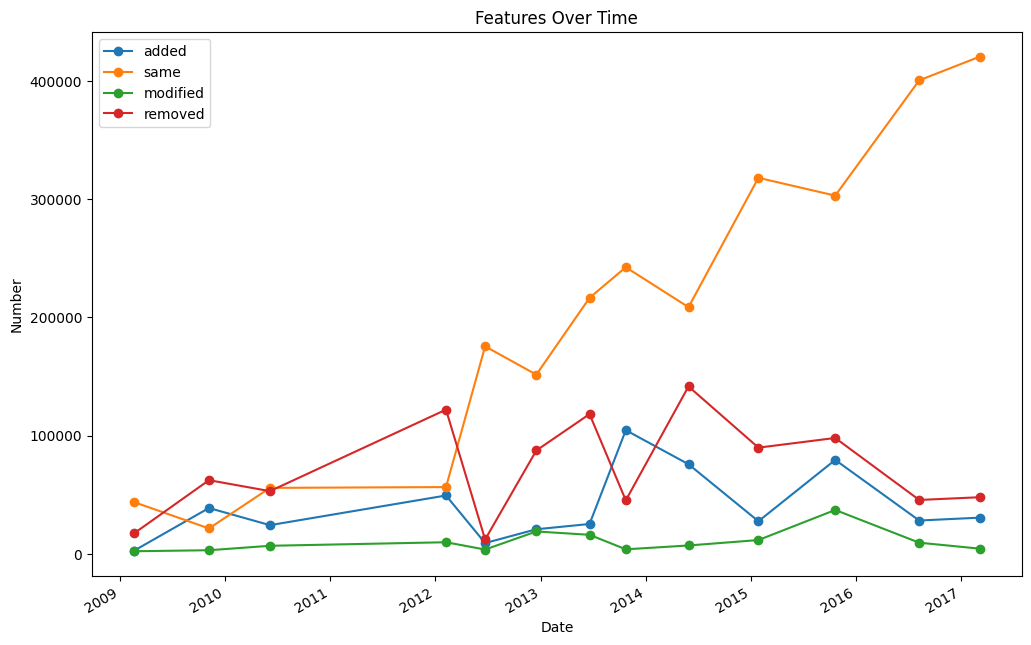

In [229]:
# WRITE YOUR CODE HERE
set_B['date'] = pd.to_datetime(set_B['date'])

# Set 'date' as index
set_B.set_index('date', inplace=True)

# Plot all features
set_B.plot(figsize=(12, 8), linestyle='-', marker='o')

plt.xlabel('Date')
plt.ylabel('Number')
plt.title('Features Over Time')
plt.legend()
plt.show()

### Question:

1. Do you find empirical support for the Law of Continuing Change ? Motivate your response.


The continuous addition, modification, and deletion of lines indicate that the software is in a state of continual evolution.